In [25]:
import pickle
import numpy as np
prt = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb'))
ft = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb'))
n, y, x = prt.shape

#point cloud generation - coin flip method
ran = np.random.default_rng().uniform(size = (n,y,x))
flips = prt < ran
xpts1 = list()
ypts1 = list()
xypts1 = list()
for m in range(n):
    pts = np.argwhere(flips[m] == False)
    xypts1.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1.append(pts_y)
    xpts1.append(pts_x)  


In [8]:
import pickle
import numpy as np
prtest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb'))
ftest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb'))
ft = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb'))
prt = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb'))
ntest, ytest, xtest = prtest.shape
n, y, x = prt.shape


In [262]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot




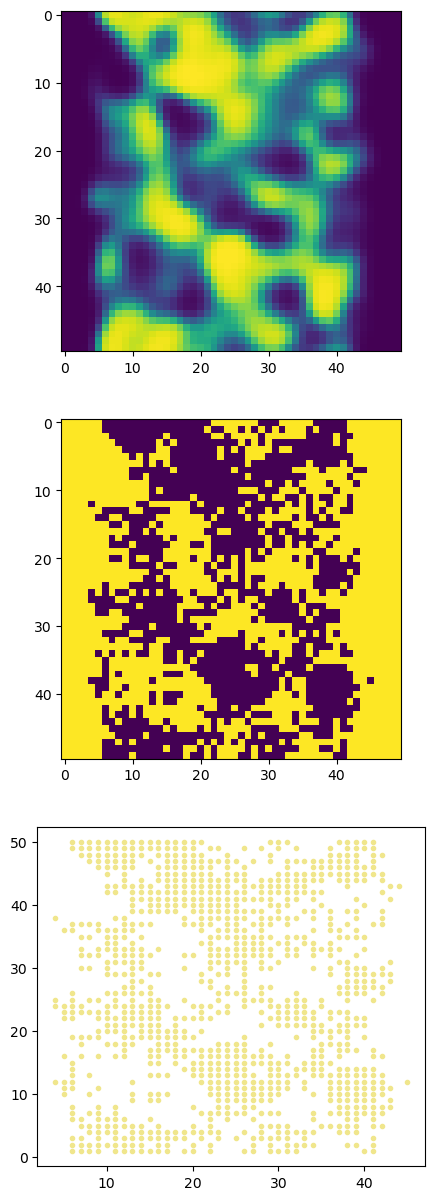

In [98]:
import matplotlib.pyplot as plt
inum = 19
train = prt[inum]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
train = flips[inum]
ax2.imshow(train)
ax3.scatter(xpts1[inum],50-ypts1[inum],marker = '.', color = 'khaki')

In [215]:
#point cloud generation - coin flip method -- test
rantest = np.random.default_rng().uniform(size = (ntest,ytest,xtest))
flipstest = prtest < rantest
xpts1test = list()
ypts1test = list()
xypts1test = list()
for m in range(ntest):
    pts = np.argwhere(flipstest[m] == False)
    xypts1test.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1test.append(pts_y)
    xpts1test.append(pts_x)  



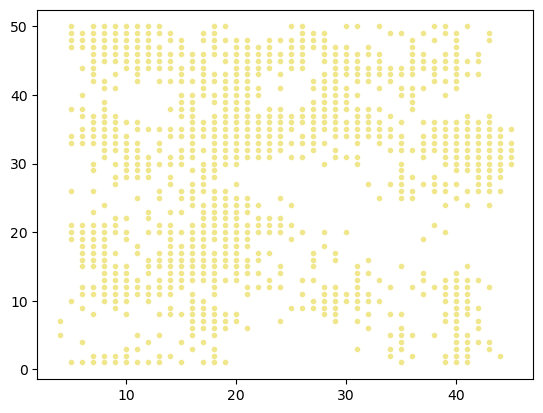

In [330]:
i=0
plt.scatter(xpts1[i],50-ypts1[i],marker = '.', color = 'khaki')
plt.show()

In [163]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(n_jobs=-1)
PtCloudPers1 = VR.fit_transform(xypts1)
VR.plot(PtCloudPers1,0)


In [ ]:
#average of 10
PtCloudPersvect10 = list()
PtCloudPersvect10test = list()
for g in range(10):
    #train set
    randummy = np.random.default_rng().uniform(size = (n,y,x))
    flipsdummy = prt < randummy
    xypts1dummy = list()
    for m in range(n):
        ptsdummy = np.argwhere(flipsdummy[m] == False)
        xypts1dummy.append(ptsdummy)
    PtCloudPersdummy = VR.fit_transform(xypts1dummy)
    PtCloudPersvect10.append(PtCloudPersdummy)
    #test set
        randummy = np.random.default_rng().uniform(size = (ntest,ytest,xtest))
        flipsdummy = prtest < randummy
        xypts1dummy = list()
    for m in range(n):
        ptsdummy = np.argwhere(flipsdummy[m] == False)
        xypts1dummy.append(ptsdummy)
    PtCloudPerstestdummy = VR.fit_transform(xypts1dummy)
    PtCloudPersvect10test.append(PtCloudPerstestdummy)

In [216]:
PtCloudPers1test = VR.fit_transform(xypts1test)
VR.plot(PtCloudPers1test,0)

In [9]:
#point cloud generation - a measure on a square

msr = np.sum(np.sum(prt, axis=-1), axis=-1)
k = np.round(msr)

ypts2 = list()
xpts2 = list()
xypts2 = list()

for m in range(n):
    p0 = prt[m]/msr[m]     #probability matrix
    p_flat = p0.flatten()
    pts = np.random.default_rng().choice(x*y,int(k[m]),p=p_flat)
    pts_y = pts//y
    pts_x = pts%x
    pts_xy = np.transpose([pts_x,pts_y])
    ypts2.append(pts_y)
    xpts2.append(pts_x)
    xypts2.append(pts_xy)


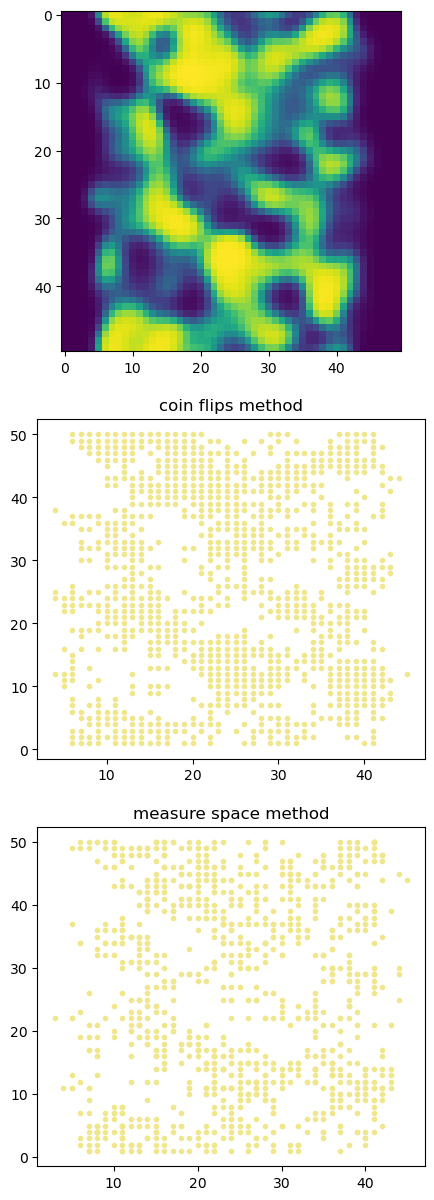

In [110]:
#comparing coin flips and msr space
i = 19
train = prt[i]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
ax2.scatter(xpts1[i],50-ypts1[i],marker = '.', color = 'khaki')
ax2.set_title('coin flips method')
ax3.scatter(xpts2[i],50-ypts2[i],marker = '.', color = 'khaki')
ax3.set_title('measure space method')
plt.show()

In [194]:
#comparing coin flips and msr space - no. of points
flipsptscount = list()
for m in range(n):
    flipsptscount.append(xypts1[m].shape)
msrptscount = list()
for m in range(n):
    msrptscount.append(xypts2[m].shape)

flipsptscount = np.array(flipsptscount)
msrptscount = np.array(msrptscount)
ptsratio = flipsptscount / msrptscount
print(ptsratio.mean())

# note this is the comparison of no. of points counting multiplicities - and is, as expected, equal.

xypts2uniq = list()
msrptscountuniq = list()
for m in range(n):
    d = np.unique(xypts2[m])
    xypts2uniq.append(d)
    msrptscountuniq.append(d.shape)

msrptscountuniq = np.array(msrptscountuniq)
ptsratiouniq = flipsptscount / msrptscountuniq
print(ptsratiouniq.mean())
    


0.9996665921256771
9.40947


In [323]:
# sum(p-q) vs flux flip
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
pers1diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0[j] = diff_sumC

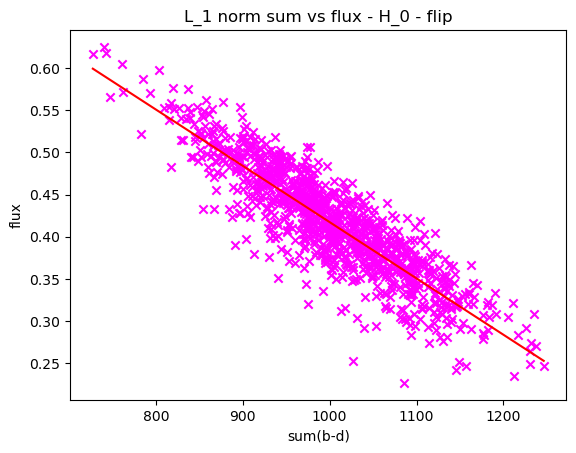

In [315]:
_ = plt.scatter(pers1diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0, ft, 1)
r = [min(pers1diff_sum_0),max(pers1diff_sum_0)]
_ = plt.plot([min(pers1diff_sum_0),max(pers1diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

In [320]:
# sum(p-q) vs flux flip -- test
itest = PtCloudPers1test.shape[0]
pers1diff_sum_0test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0test[j] = diff_sumC

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(pers1diff_sum_0.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


NameError: name 'pers1diff_sum_0' is not defined

In [322]:
# OLS flip space L1 sum H0
import statsmodels.api as sm
pers1diff_sum_0plusc = sm.add_constant(pers1diff_sum_0)
mod = sm.OLS(ft, pers1diff_sum_0plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3435.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:02   Log-Likelihood:                 2059.3
No. Observations:                1000   AIC:                            -4115.
Df Residuals:                     998   BIC:                            -4105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0840      0.011     94.722      0.0

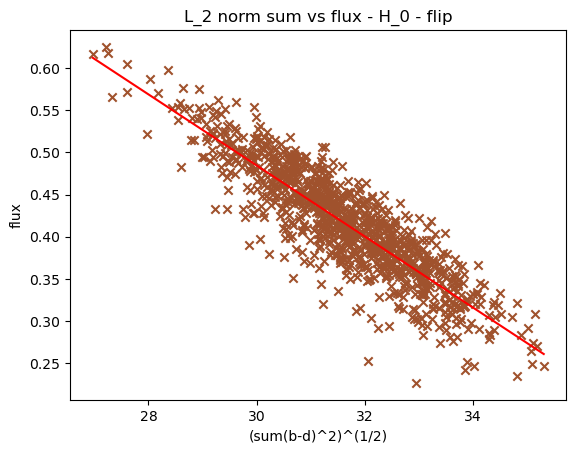

In [324]:
# L2 norm flip H0
pers1diff_sum_0_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_0_L2,ft, marker='x',color='sienna')
_ = plt.title('L_2 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L2, ft, 1)
a = min(pers1diff_sum_0_L2)
b = max(pers1diff_sum_0_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [4]:
#linear regression using polynomial fit
import numpy.polynomial.polynomial as npl
c, m  = npl.polyfit(msr, ft, 1)
a = min(msr)
b = max(msr)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

NameError: name 'msr' is not defined

In [325]:
# L2 norm flip H0 -- test
pers1diff_sum_0_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2test[x] = diff_sumCL2

In [327]:
ytest = LR().fit(pers1diff_sum_0_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L2test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  31.248127740246904
rsq =  0.8437593612987655


In [328]:
# OLS flip space L2 sum H0
import statsmodels.api as sm
pers1diff_sum_0_L2plusc = sm.add_constant(pers1diff_sum_0_L2)
mod = sm.OLS(ft, pers1diff_sum_0_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3453.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:21   Log-Likelihood:                 2061.4
No. Observations:                1000   AIC:                            -4119.
Df Residuals:                     998   BIC:                            -4109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7470      0.023     77.041      0.0

1000


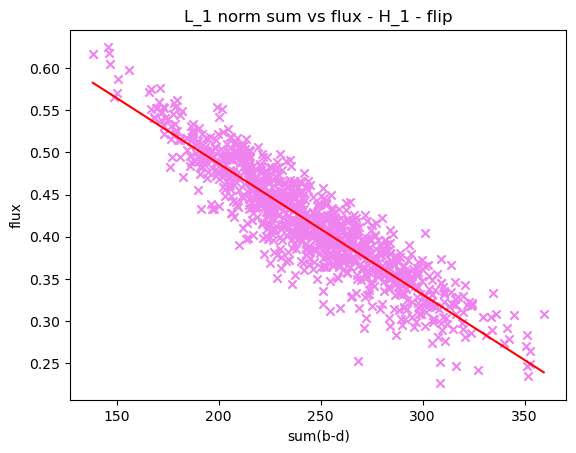

In [268]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
print(i)
pers1diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1[j] = diff_sumC
_ = plt.scatter(pers1diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1, ft, 1)
r = [min(pers1diff_sum_1),max(pers1diff_sum_1)]
_ = plt.plot([min(pers1diff_sum_1),max(pers1diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [269]:
# sum(p-q) vs flux  --test
pers1diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1test[j] = diff_sumC

In [271]:
# test nmse and rsq flip L1 H1
ytest = LR().fit(pers1diff_sum_1.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  27.002039006641674
rsq =  0.8649898049667917


In [170]:
# OLS flip space L1 sum H1
import statsmodels.api as sm
pers1diff_sum_1plusc = sm.add_constant(pers1diff_sum_1)
mod = sm.OLS(ft, pers1diff_sum_1plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     4545.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:10:52   Log-Likelihood:                 2171.0
No. Observations:                1000   AIC:                            -4338.
Df Residuals:                     998   BIC:                            -4328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7965      0.006    139.349      0.0

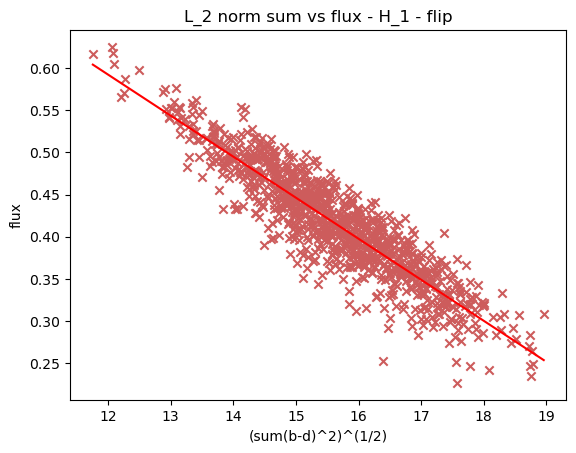

In [184]:
# L2 norm flip H1
pers1diff_sum_1_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_1_L2,ft, marker='x',color='indianred')
_ = plt.title('L_2 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L2, ft, 1)
a = min(pers1diff_sum_1_L2)
b = max(pers1diff_sum_1_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [272]:
# L2 norm flip H1 -- test
pers1diff_sum_1_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2test[x] = diff_sumCL2

In [273]:
# test nmse and rsq flip L1 H1
ytest = LR().fit(pers1diff_sum_1_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L2test.reshape(-1,1))
print('results on the training set linear regression, L2 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H1, flip method
nmse =  25.40831102520962
rsq =  0.8729584448739519


In [187]:
# OLS flip space L2 sum H1
import statsmodels.api as sm
pers1diff_sum_1_L2plusc = sm.add_constant(pers1diff_sum_1_L2)
mod = sm.OLS(ft, pers1diff_sum_1_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     4690.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:32:10   Log-Likelihood:                 2183.9
No. Observations:                1000   AIC:                            -4364.
Df Residuals:                     998   BIC:                            -4354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1748      0.011    105.663      0.0

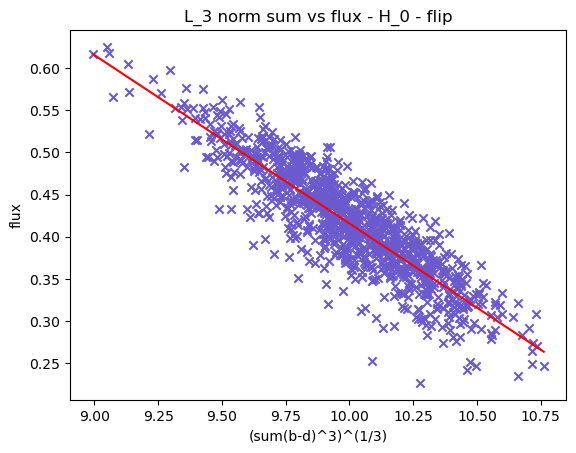

In [286]:
# L3 norm flip H0
pers1diff_sum_0_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3[x] = diff_sumCroot

# test set
pers1diff_sum_0_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_0_L3,ft, marker='x',color='slateblue')
_ = plt.title('L_3 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L3, ft, 1)
a = min(pers1diff_sum_0_L3)
b = max(pers1diff_sum_0_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [287]:
# test nmse and rsq flip L3 H0
ytest = LR().fit(pers1diff_sum_0_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  31.22430090642938
rsq =  0.8438784954678531


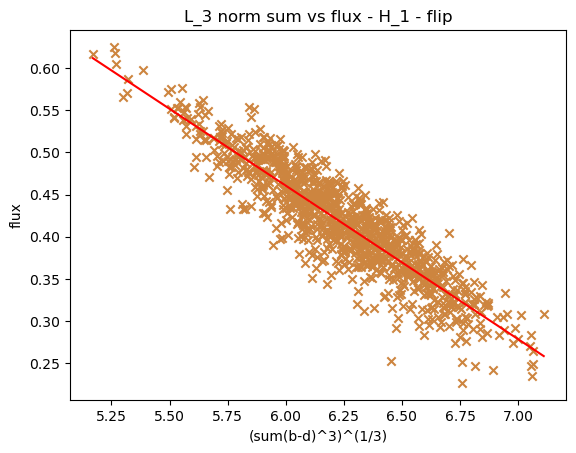

In [288]:
# L3 norm flip H1
pers1diff_sum_1_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3[x] = diff_sumCroot

# test set
pers1diff_sum_1_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_1_L3,ft, marker='x',color='peru')
_ = plt.title('L_3 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L3, ft, 1)
a = min(pers1diff_sum_1_L3)
b = max(pers1diff_sum_1_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [289]:
# test nmse and rsq flip L3 H1
ytest = LR().fit(pers1diff_sum_1_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  25.16816758988569
rsq =  0.8741591620505715


In [313]:
# creating a lower resolution image to allow for greater no. of tests
prtqtr = list()
Y = int(y/2)
X = int(x/2)
f=0
g=0
for m in range(n):
    prtqtrdummy = np.zeros([Y,X])
    for f in range(Y):
        for g in range(X):
            prtqtrdummy[f,g] = (1/4)*(prt[m,2*f,2*g]+prt[m,2*f+1,2*g]+prt[m,2*f,2*g+1]+prt[m,2*f+1,2*g+1])
    prtqtr.append(prtqtrdummy)


In [278]:
# test nmse and rsq flip L1 H0 and H1
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01test = np.array([pers1diff_sum_0test,pers1diff_sum_1test]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L1 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H0 and H1, flip method
nmse =  27.331453908597805
rsq =  0.8633427304570109


In [171]:
#statsmodel flip space OLS L1 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01plusc = sm.add_constant(pers1diff_sum_01)
mod01 = sm.OLS(ft, pers1diff_sum_01plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2272.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:13:26   Log-Likelihood:                 2171.4
No. Observations:                1000   AIC:                            -4337.
Df Residuals:                     997   BIC:                            -4322.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7772      0.022     35.466      0.0

In [280]:
# test nmse and rsq flip L2 H0 and H1
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2test = np.array([pers1diff_sum_0_L2test,pers1diff_sum_1_L2test]).T
ytest = LR().fit(pers1diff_sum_01_L2,np.array(ft)).predict(pers1diff_sum_01_L2test)
print('results on the training set linear regression, L2 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H0 and H1, flip method
nmse =  25.951992281690657
rsq =  0.8702400385915467


In [186]:
#statsmodel flip space OLS L2 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2plusc = sm.add_constant(pers1diff_sum_01_L2)
mod01 = sm.OLS(ft, pers1diff_sum_01_L2plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2352.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:27:32   Log-Likelihood:                 2185.6
No. Observations:                1000   AIC:                            -4365.
Df Residuals:                     997   BIC:                            -4351.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0967      0.044     25.131      0.0

In [347]:
# try adding measure -- flip L2 norm and msr
msrtest = np.sum(np.sum(prtest, axis=-1), axis=-1)
print(msrtest.shape)
pers1diff_sum_0.shape

(200,)


(1000,)

In [284]:

pers1diff_sum_1_L2_addmsr = np.array([pers1diff_sum_1_L2,msr]).T
pers1diff_sum_1_L2_addmsrtest = np.array([pers1diff_sum_1_L2test,msrtest]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.91956517447356
rsq =  0.8854021741276322


In [351]:
#10 times msr
pers1diff_sum_1_L2_addmsr = np.array([pers1diff_sum_1_L2,10*msr]).T
pers1diff_sum_1_L2_addmsrtest = np.array([pers1diff_sum_1_L2test,10*msrtest]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  22.919565174473533
rsq =  0.8854021741276323


In [13]:
#just measure linear regression
ytest = LR().fit(msr.reshape(-1,1),np.array(ft).reshape(-1,1)).predict(msrtest.reshape(-1,1))[:,0]
print('results on the training set linear regression, msr')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

NameError: name 'msrtest' is not defined

[0.42709343 0.47043574 0.47644506 0.36028256 0.3591392  0.39754168
 0.44178319 0.45707411 0.43928151 0.42215626 0.38434724 0.47074666
 0.41171055 0.33467475 0.27311791 0.32783766 0.55564219 0.48339333
 0.47324819 0.43331093 0.42775529 0.48519149 0.40167528 0.37068598
 0.39069423 0.55848437 0.36632749 0.33186666 0.3638509  0.29427634
 0.45806515 0.50876532 0.3867238  0.43644077 0.45175858 0.40153121
 0.45759346 0.37327815 0.4588772  0.42544482 0.35512947 0.50019073
 0.4173199  0.4558016  0.41114333 0.36474469 0.32088436 0.35442436
 0.43571323 0.43266445 0.31724498 0.3997083  0.35287933 0.2962203
 0.38452287 0.37452515 0.39549174 0.38208447 0.42724515 0.34310243
 0.47642949 0.42349685 0.44935346 0.53801176 0.52265532 0.46805692
 0.36124794 0.5307017  0.40444427 0.47859731 0.37964383 0.46305394
 0.4231054  0.49718104 0.46622163 0.441038   0.48161534 0.52085884
 0.40171345 0.34470833 0.45938597 0.46171499 0.45543752 0.38042822
 0.39018881 0.41065915 0.3839053  0.39415051 0.42767839 0.38549

In [338]:
print(ft)

[0.4554189049891245, 0.37062679820494604, 0.37776554399917894, 0.4706081154425658, 0.40831835672412375, 0.460216374910389, 0.37636722581815796, 0.32270003989354556, 0.3554567419279312, 0.455872273005678, 0.41586958692502024, 0.5520679318526251, 0.45035879377511195, 0.37427651502739173, 0.4388054728873115, 0.36142406028552304, 0.4629920852072532, 0.4165086038391471, 0.3338378018215125, 0.37009442711907753, 0.40215673589451695, 0.3316221401053941, 0.364480560294498, 0.44877040738728086, 0.48262917446991177, 0.338015565555716, 0.48410121850638776, 0.3185345879967593, 0.49168158520473426, 0.47380815169873947, 0.40296986281335023, 0.39044590509313465, 0.45476179886852347, 0.36014022782325145, 0.320334827996163, 0.43463961242444454, 0.3285934884208152, 0.39060346384802797, 0.4060799667155731, 0.47526874382780787, 0.38846400175611945, 0.43694407404687297, 0.44623018041590684, 0.4257458402818793, 0.5618679995664687, 0.35245646114070844, 0.3313371484518593, 0.39792601145138007, 0.30348824718892

In [101]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence()
PtCloudPers2 = VR.fit_transform(xypts2)
VR.plot(PtCloudPers2,0)

1000


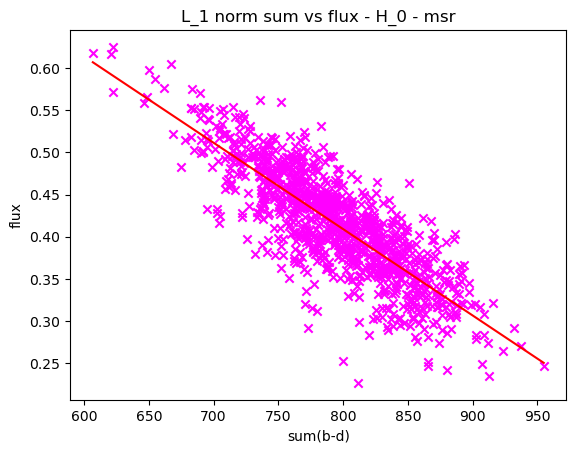

In [198]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_0[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_0, ft, 1)
r = [min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)]
_ = plt.plot([min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

1000


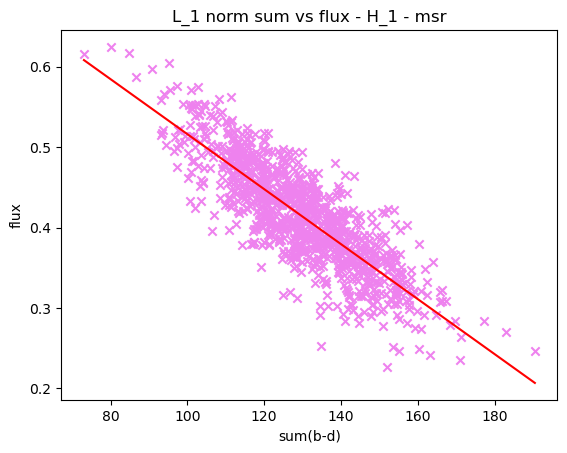

In [199]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [200]:
#Persistence diagrams flips
from gtda.diagrams import PersistenceLandscape
PLless = PersistenceLandscape(n_layers=10,n_bins=10)
xflip= PLless.fit_transform(PtCloudPers1)

In [201]:
PLless.plot(xflip,340)

In [202]:
#linear regression of all layers flip
a,b,c = xflip.shape
print(a,b,c)
xflipall = np.reshape(xflip,[a,b*c,-1])[:,:,0]
xflipallc = sm.add_constant(xflipall)
flippersmodelall = sm.OLS(ft,xflipallc)
flippersresultsall = flippersmodelall.fit()
print(flippersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     7.928
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.25e-64
Time:                        16:12:46   Log-Likelihood:                 1587.2
No. Observations:                1000   AIC:                            -3004.
Df Residuals:                     915   BIC:                            -2587.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5689      0.767      0.7

In [203]:
#linear regression first layer flip
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xflipbins = PL.fit_transform(PtCloudPers1)
PL.plot(xflipbins,340)

In [204]:
#linear regression of first layer of H0 and H1 flip

xflipbins01  = np.concatenate((xflipbins[:,0,:],xflipbins[:,2,:]), axis=1)
flippersmodel01 = sm.OLS(ft,xflipbins01)
flippersresults01 = flippersmodel01.fit()
print(flippersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.137
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.19e-32
Time:                        16:15:07   Log-Likelihood:                 1517.0
No. Observations:                1000   AIC:                            -2816.
Df Residuals:                     891   BIC:                            -2281.
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.872e-13   1.74e-13      1.075      0.2

In [154]:
#Persistence diagrams from our measure space method
from gtda.diagrams import PersistenceLandscape
xmsr= PLless.fit_transform(PtCloudPers2)

In [158]:
PLless.plot(xmsr,340)

In [162]:
#linear regression of all layers msr
a,b,c = xmsr.shape
print(a,b,c)
xmsrall = np.reshape(xmsr,[a,b*c,-1])[:,:,0]
xmsrallc = sm.add_constant(xmsrall)
msrpersmodelall = sm.OLS(ft,xmsrallc)
msrpersresultsall = msrpersmodelall.fit()
print(msrpersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     9.690
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.68e-76
Time:                        11:59:54   Log-Likelihood:                 1613.4
No. Observations:                1000   AIC:                            -3069.
Df Residuals:                     921   BIC:                            -2681.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.028e-16   5.88e-16      0.8

In [159]:
#linear regression first layer
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xmsrbins = PL.fit_transform(PtCloudPers2)
PL.plot(xmsrbins,340)

In [161]:
#linear regression of first layer of H0 and H1 msr

xmsrbins01  = np.concatenate((xmsrbins[:,0,:],xmsrbins[:,2,:]), axis=1)
msrpersmodel01 = sm.OLS(ft,xmsrbins01)
msrpersresults01 = msrpersmodel01.fit()
print(msrpersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     4.337
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           6.62e-34
Time:                        12:48:31   Log-Likelihood:                 1517.8
No. Observations:                1000   AIC:                            -2826.
Df Residuals:                     895   BIC:                            -2310.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.908e-14   1.39e-13      0.642      0.5